In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CORDIS

## 1. Data loading and preprocessing

In [3]:
# Load data

columns_dates = ['startDate','endDate']

cordish2020 = pd.read_csv("data/cordis/cordis-h2020projects.csv",sep=";",decimal=",",parse_dates=columns_dates)
cordisfp7 = pd.read_csv("data/cordis/cordis-fp7projects.csv",sep=";",decimal=",",parse_dates=columns_dates)
cordisfp6 = pd.read_csv("data/cordis/cordis-fp6projects.csv",sep=";",decimal=",",parse_dates=columns_dates)

# Manual preprocessing...
cordisfp6 = cordisfp6.drop(columns=['totalCost'])
cordisfp6 = cordisfp6.drop(columns=['ecMaxContribution'])
totalCostFP6 = pd.read_csv("data/cordis/totalCostFP6.csv",sep=";",decimal=".")
cordisfp6['totalCost'] = totalCostFP6
ecMaxContributionFP6 = pd.read_csv("data/cordis/ecMaxContributionFP6.csv",sep=";",decimal=".")
cordisfp6['ecMaxContribution'] = ecMaxContributionFP6

In [4]:
# Shapes
print("H2020 (2014-2020): ",cordish2020.shape)
print("FP7 (2007-2013): ",cordisfp7.shape)
print("FP6 (2002-2006): ",cordisfp6.shape)

H2020 (2014-2020):  (32161, 21)
FP7 (2007-2013):  (25778, 21)
FP6 (2002-2006):  (10082, 21)


In [8]:
# Append data
cordis = cordish2020.append(cordisfp7)
cordis = cordis.append(cordisfp6)
cordis.shape

(68021, 21)

In [89]:
# Compute duration in days
cordis['duration_days'] = (cordis['endDate'] - cordis['startDate']).dt.days

# Extract start and end years and store in new column of dataframe
cordis['startYear'] = pd.DatetimeIndex(cordis['startDate']).year
cordis['endYear'] = pd.DatetimeIndex(cordis['endDate']).year
cordis = cordis.fillna({'startYear':0,'endYear':0})
cordis = cordis.astype({"startYear":'int', "endYear":'int'}) 

# Remove useless columns
cordis = cordis.drop(columns=['startDate','endDate','subjects'])

In [90]:
cordis.dtypes

rcn                       int64
id                       object
acronym                  object
status                   object
programme                object
topics                   object
frameworkProgramme       object
title                    object
projectUrl               object
objective                object
totalCost               float64
ecMaxContribution       float64
call                     object
fundingScheme            object
coordinator              object
coordinatorCountry       object
participants             object
participantCountries     object
duration_days           float64
startYear                 int64
endYear                   int64
dtype: object

In [33]:
cordis.head()

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,projectUrl,objective,...,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,duration_days,startYear,endYear
0,72765,4265,COREGRID,NaN,FP6-IST,IST-2002-2.3.2.8,FP6,"European research network on foundations, soft...",http://www.coregrid.net/,CoreGRID aims at strengthening and advancing s...,...,8200000,NaN,NoE,GEIE ERCIM,FR,UNIVERSITE HENRI POINCARE NANCY 1;UNIVERSITE J...,FR;UK;SE;HU;BE;IT;DE;FI;CY;CZ;NL;ES;BG;PL;CL;A...,1460.0,2004.0,2008.0
1,79369,034084,SELFMAN,NaN,FP6-IST,IST-2005-2.5.5,FP6,Self Management for large-scale distributed sy...,http://www.ist-selfman.org/wiki/index.php/self...,The goal of SELFMAN is to make large-scale dis...,...,1960000,NaN,STREP,UNIVERSITE CATHOLIQUE DE LOUVAIN,BE,KONRAD-ZUSE-ZENTRUM FUER INFORMATIONSTECHNIK B...,DE;FR;SE;SG,1095.0,2006.0,2009.0
2,80458,517675-2,MICROTRAP,NaN,FP6-IST,IST-2004-2.3.4.1 b7,FP6,Development of a pan-European Microtrap Techno...,NaN,MICROTRAP is a Strep proposal aimed at develop...,...,1769000,NaN,STREP,NPL MANAGEMENT LIMITED,UK,"UNIVERSITAET INNSBRUCK;THE CHANCELLOR, MASTERS...",AT,1095.0,2006.0,2009.0
3,78376,027305,NOBEL PHASE 2,NaN,FP6-IST,IST-2004-2.4.4,FP6,Next generation optical network for Broadband ...,http://www.ist-nobel.org/,To achieve the strategic goal of broadband for...,...,12109996,NaN,IP,TELECOM ITALIA SPA,IT,CORECOM - CONSORZIO RICERCHE ELABORAZIONE COMM...,IT;DE,730.0,2006.0,2008.0
4,75263,502885,MERSEA,NaN,FP6-AEROSPACE,AERO-2.3,FP6,Marine Environment and security for the Europe...,NaN,Marine Environment and security for the Europe...,...,13997699,FP6-2002-SPACE-1,IP,INSTITUT FRANCAIS DE RECHERCHE POUR L'EXPLOITA...,FR,EUROPEAN CENTRE FOR MEDIUM-RANGE WEATHER FOREC...,UK;IE;CY;NL;IT;ES;DE;FR;FI;NO;CA;BE;EL;TR;DK,1643.0,2004.0,2008.0


## 2. Descriptive analysis

### Status
- ONG: ongoing
- SIGNED: firmado
- CLOSED: cerrado (¿sin terminar?)
- CLO: ¿=closed?
- TERMINATED: terminado (¿finalizado?)
- CAN: ¿?

In [65]:
cordis['status'].value_counts()

ONG           23503
SIGNED        20559
CLOSED        11178
CLO            2136
TERMINATED      424
CAN             179
Name: status, dtype: int64

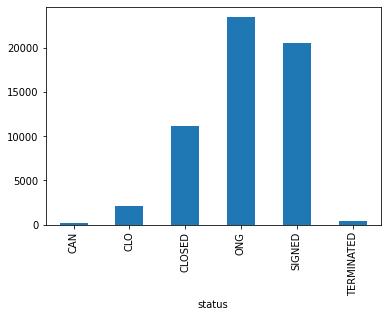

In [66]:
cordis.groupby('status')['id'].nunique().plot(kind='bar')
plt.show()

### Topics

In [67]:
cordis['topics'].value_counts()

EIC-SMEInst-2018-2020           2439
MOBILITY-2.1                    1820
MSCA-IF-2019                    1482
MSCA-IF-2018                    1373
MSCA-IF-2017                    1367
                                ... 
JTI-CS2-2020-CfP11-LPA-01-90       1
AAT-2007-6.2-02                    1
JTI-CS-2010-5-ECO-01-016           1
JTI-CS2-2016-CFP04-ENG-04-06       1
INFRASTR-5;INFRASTR-6              1
Name: topics, Length: 9007, dtype: int64

In [16]:
#cordis.groupby('topics')['id'].nunique().plot(kind='bar')
#plt.show()

### Start and end dates

In [68]:
cordis['startYear'].value_counts()

2019    5550
2018    5064
2015    5038
2017    4978
2016    4955
2013    4562
2020    4484
2012    4332
2011    3966
2010    3606
2014    3335
2006    3057
2009    2917
2008    2903
2005    2770
2004    2456
2021    2034
2007    1540
0        241
2003     216
2022      17
Name: startYear, dtype: int64

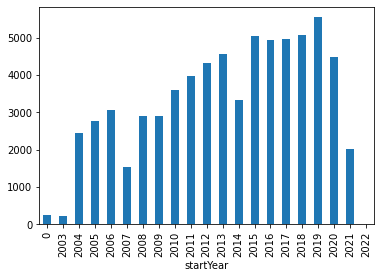

In [69]:
cordis.groupby('startYear')['id'].nunique().plot(kind='bar')
plt.show()

In [70]:
cordis['endYear'].value_counts()

2021    5146
2018    5110
2016    4998
2019    4934
2017    4905
2015    4724
2022    4691
2020    3622
2014    3617
2023    3322
2013    3180
2012    2686
2008    2664
2009    2276
2011    2249
2007    2137
2010    2120
2024    1872
2006    1201
2025    1200
2005     498
2026     430
0        326
2004      96
2027      15
2003       2
Name: endYear, dtype: int64

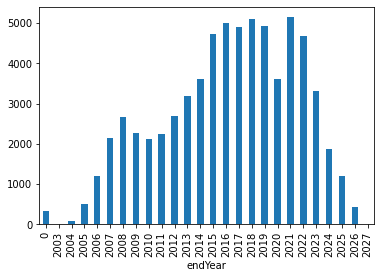

In [71]:
cordis.groupby('endYear')['id'].nunique().plot(kind='bar')
plt.show()

In [72]:
cordis['duration_days'].mean()

1104.2389021021377

array([[<AxesSubplot:title={'center':'duration_days'}>]], dtype=object)

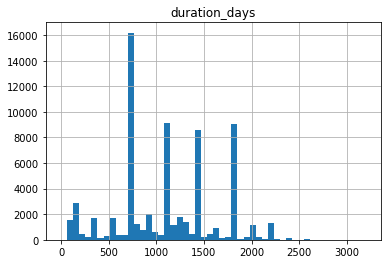

In [73]:
cordis.hist(column='duration_days',bins=50)

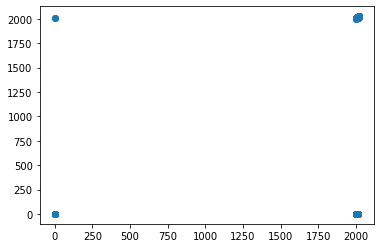

In [74]:
plt.scatter(cordis['startYear'],cordis['endYear'])

### Total cost

In [75]:
cordis['totalCost'].mean()

2602212.4953399873

array([[<AxesSubplot:title={'center':'totalCost'}>]], dtype=object)

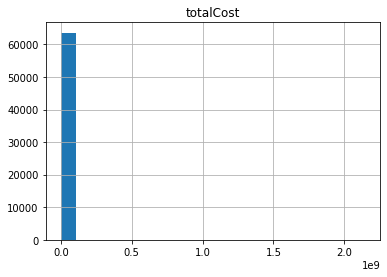

In [76]:
cordis.hist(column='totalCost',bins=20)

In [91]:
cordis['ecMaxContribution'].mean()

1850300.975259437

array([[<AxesSubplot:title={'center':'ecMaxContribution'}>]], dtype=object)

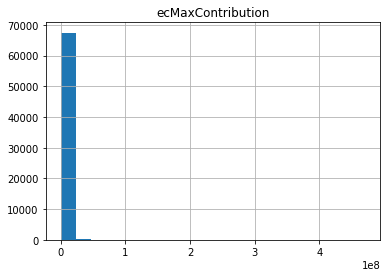

In [92]:
cordis.hist(column='ecMaxContribution',bins=20)

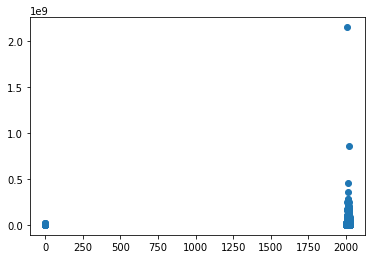

In [93]:
plt.scatter(cordis['endYear'],cordis['totalCost'])

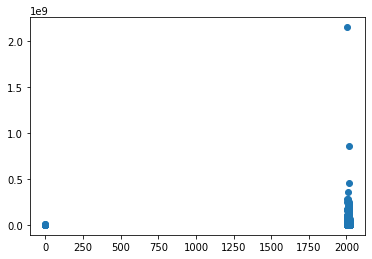

In [94]:
plt.scatter(cordis['startYear'],cordis['totalCost'])

### Coordinator country

In [95]:
cordis['coordinatorCountry'].value_counts()

UK    11918
DE     8096
FR     7049
ES     7018
IT     5739
      ...  
KZ        1
AE        1
NG        1
IR        1
PK        1
Name: coordinatorCountry, Length: 90, dtype: int64

In [35]:
heatmap_country_year_budget = pd.pivot_table(data=cordis,index='coordinatorCountry',values='totalCost',columns='endYear')
heatmap_country_year_budget.head()

endYear,1990.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,...,2054.0,2055.0,2057.0,2059.0,2061.0,2062.0,2063.0,2064.0,2065.0,2070.0
coordinatorCountry,,,,,,,,,,,,,,,,,,,,,
AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='endYear', ylabel='coordinatorCountry'>

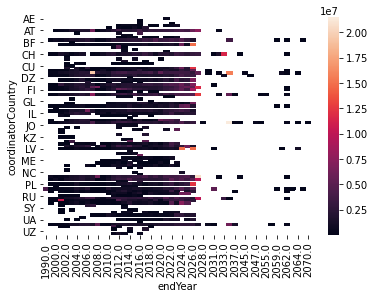

In [36]:
sns.heatmap(heatmap_country_year_budget)

# MALLET

In [37]:
from customMallet import CustomMallet

In [38]:
corpus_list = cordis['objective'].tolist()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
testmallet = CustomMallet()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
testmallet.corpus2doctopic(corpus_list,10)